<a href="https://colab.research.google.com/github/AlexBB999/junk/blob/master/Day_53_Free_Style_3_25_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Load the the wine quality data set. Data set

Fit PCA to all 12 components and plot the cumulative sum of the ‘pca.explained_variance_ratio_’

Identify the number of principal components to explain 90% of the variance.
Build a logistic regression model and record the accuracy.

Fit LLE with the same number of components and 30 neighbors, then repeat 4).

Record your observations and identify your top performing model

 Does manifold learning improve predictive performance over PCA?

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn import metrics
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [0]:
wine=pd.read_csv('https://raw.githubusercontent.com/AlexBB999/junk/master/wineQualityReds.csv')

In [3]:
wine.head()

,Unnamed: 0,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0,1,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,2,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,3,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,4,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,5,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
wine.shape

(1599, 13)

In [5]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 13 columns):
Unnamed: 0              1599 non-null int64
fixed.acidity           1599 non-null float64
volatile.acidity        1599 non-null float64
citric.acid             1599 non-null float64
residual.sugar          1599 non-null float64
chlorides               1599 non-null float64
free.sulfur.dioxide     1599 non-null float64
total.sulfur.dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(2)
memory usage: 162.5 KB


In [0]:
X=wine.drop('quality',1)
y=wine['quality']

In [0]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()


In [0]:
df_std = scale.fit_transform(x)

In [0]:
scikit_pca = PCA()
pca = PCA(.9)

pca.fit_transform(df_std)

array([[-1.10503704,  1.01738783, -2.23928527, ...,  1.55757089,
        -0.25757413,  0.03852203],
       [-0.31147729,  2.23038887, -1.10113815, ...,  0.64264773,
         1.51369661, -0.30310965],
       [-0.27670935,  1.30491076, -1.49627925, ...,  0.91764327,
         0.93835103,  0.0340857 ],
       ...,
       [-1.83311006,  0.02614818,  1.422036  , ..., -0.73639299,
        -0.75308498, -0.85309862],
       [-2.58477688,  0.79211269,  0.95249609, ..., -0.65716789,
        -1.00202224, -1.02165416],
       [-0.87709224, -0.93222218,  1.89664547, ..., -0.65064108,
        -1.23110205,  0.57016129]])

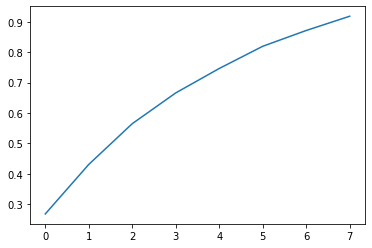

In [0]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))

In [0]:
# PCA with 2 components:
pca = PCA(n_components=2)
X_pca=pca.fit_transform(df_std)

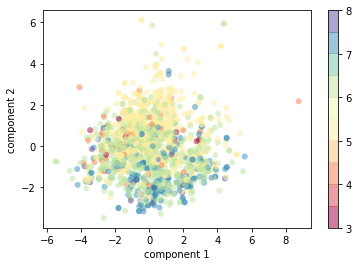

In [0]:
# The following will plot your first two components
plt.scatter(X_pca[:, 0], X_pca[:, 1],
            c=y, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

**LOGISTIC REGRESSION**

In [0]:
X=wine.drop('quality',1)
y=wine['quality']

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [0]:
scale.fit(X_train)
X_train=scale.transform(X_train)
X_test=scale.transform(X_test)

In [69]:
log = LogisticRegression(solver = 'lbfgs')
log.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
preds=log.predict(X_test)

In [71]:
log.score(X_train,y_train)

0.6300268096514745

In [72]:
 accuracy=metrics.accuracy_score(y_test,preds)
 accuracy

0.5458333333333333

**LOGISTIC REGRESSION  WITH PCA**


Now let’s train on the data with** reduced variance**.

 We will use PCA to reduce the no of components.

Decide on the variance percentages:

Fix the variances for which we would conduct the experiments.


In [0]:
variance_list = [0.95,0.90,0.85,0.80,0.75,0.70,.65,.6,.5,.4]

In [111]:
for variance in variance_list:
   pca = PCA(variance)
   pca.fit(X_train)
   p_train=pca.transform(X_train)
   n_components = pca.n_components_
   p_test=pca.transform(X_test)
   
   #print(n_components)
   log = LogisticRegression(solver = 'lbfgs')
   log.fit(p_train,y_train)
   preds=log.predict(p_test)
   score=log.score(p_train,y_train)
   #print(score)
   accuracy=metrics.accuracy_score(y_test,preds)
   #print(accuracy)
  
   print('variane explained    ', (variance*100),'     number of components   ', n_components, '    score   ',score,'    accuracy   ', accuracy)



variane explained     95.0      number of components    9     score    0.610366398570152     accuracy    0.5375
variane explained     90.0      number of components    8     score    0.6193029490616622     accuracy    0.5354166666666667
variane explained     85.0      number of components    7     score    0.6085790884718498     accuracy    0.5291666666666667
variane explained     80.0      number of components    6     score    0.6085790884718498     accuracy    0.53125
variane explained     75.0      number of components    6     score    0.6085790884718498     accuracy    0.53125
variane explained     70.0      number of components    5     score    0.5889186773905273     accuracy    0.5375
variane explained     65.0      number of components    4     score    0.5987488829311886     accuracy    0.5291666666666667
variane explained     60.0      number of components    4     score    0.5987488829311886     accuracy    0.5291666666666667
variane explained     50.0      number of compo